In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv('X-IIoT dataset.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/X-IIoT dataset.csv')


<ipython-input-4-f3085a139ac5>:1: DtypeWarning: Columns (1,3,5,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/X-IIoT dataset.csv')


In [ ]:
df.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,09-01-2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,...,5,0,0,0,0,0,0,Scanning_vulnerability,Reconnaissance,Attack
1,13-01-2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,...,0,0,0,0,0,0,0,Normal,Normal,Normal
2,09-01-2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,...,0,0,0,0,0,0,0,Normal,Normal,Normal
3,27-02-2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,...,0,1,1,1,1,1,1,Normal,Normal,Normal
4,16-12-2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,...,0,0,0,0,0,0,0,Normal,Normal,Normal


In [ ]:
df['class1'].value_counts()

Normal                            421417
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17447
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2863
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    458
MitM                                 117
Fake_notification                     28
Name: class1, dtype: int64

In [ ]:
df.shape

(820834, 68)

In [ ]:
df = df.drop(['class2','class3'],axis=1)

In [ ]:
df.isnull().sum()

Date                           331
Timestamp                      297
Scr_IP                           0
Scr_port                         0
Des_IP                           0
                              ... 
File_activity                    0
Process_activity                 0
read_write_physical.process      0
is_privileged                    0
class1                           0
Length: 66, dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4260, 66)


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(816574, 66)

In [ ]:
pd.set_option('display.max_columns', 68)  # Set the maximum number of columns to 68
print(df.head(30))

          Date   Timestamp          Scr_IP Scr_port          Des_IP Des_port  \
0   09-01-2020  1578540956   192.168.2.199    49278    192.168.2.10       80   
1   13-01-2020  1578871873        10.0.1.5    39769    131.236.3.92       53   
2   09-01-2020  1578522486     172.24.1.80    59050      172.24.1.1       53   
3   27-02-2020  1582757640   192.168.2.196    37966    192.168.2.10     1880   
4   16-12-2019  1576452612     172.24.1.80    38233      172.24.1.1       53   
5   31-01-2020  1580452611  192.168.10.155    50502    192.168.2.10       80   
6   12-12-2019  1576100087     172.24.1.80    39649      172.24.1.1       53   
7   21-02-2020  1582241330     172.24.1.34    52195      172.24.1.1       53   
8   16-12-2019  1576468008     172.24.1.80    41286      172.24.1.1       53   
9   24-02-2020  1582504530    172.24.1.244    45487      172.24.1.1     5683   
10  13-01-2020  1578873665    172.24.1.213     3467    161.69.36.37       80   
11  09-01-2020  1578542271   192.168.2.1

In [ ]:
df = df.astype('str')

In [ ]:
df.replace('-', np.nan, inplace=True)
df.replace('excel', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)


# Convert the columns with hyphens to numeric data type
cols_with_hyphens = ['Scr_bytes','Des_bytes','Scr_pkts','Scr_ip_bytes', 'Des_pkts','Des_ip_bytes','total_bytes','total_packet','paket_rate','byte_rate','Scr_packts_ratio','Des_pkts_ratio','Scr_bytes_ratio','Des_bytes_ratio'] # Replace with the actual column names
df[cols_with_hyphens] = df[cols_with_hyphens].astype(float)

# Calculate median values for each feature
median_values = df.median()

# Replace NaN values with median values in the DataFrame
df.fillna(median_values, inplace=True)

<ipython-input-16-5edc0f32814b>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


In [ ]:
pd.set_option('display.max_columns', 68)  # Set the maximum number of columns to 68
print(df.head(30))

          Date   Timestamp          Scr_IP Scr_port          Des_IP Des_port  \
0   09-01-2020  1578540956   192.168.2.199    49278    192.168.2.10       80   
1   13-01-2020  1578871873        10.0.1.5    39769    131.236.3.92       53   
2   09-01-2020  1578522486     172.24.1.80    59050      172.24.1.1       53   
3   27-02-2020  1582757640   192.168.2.196    37966    192.168.2.10     1880   
4   16-12-2019  1576452612     172.24.1.80    38233      172.24.1.1       53   
5   31-01-2020  1580452611  192.168.10.155    50502    192.168.2.10       80   
6   12-12-2019  1576100087     172.24.1.80    39649      172.24.1.1       53   
7   21-02-2020  1582241330     172.24.1.34    52195      172.24.1.1       53   
8   16-12-2019  1576468008     172.24.1.80    41286      172.24.1.1       53   
9   24-02-2020  1582504530    172.24.1.244    45487      172.24.1.1     5683   
10  13-01-2020  1578873665    172.24.1.213     3467    161.69.36.37       80   
11  09-01-2020  1578542271   192.168.2.1

In [ ]:
df[cols_with_hyphens].dtypes

Scr_bytes           float64
Des_bytes           float64
Scr_pkts            float64
Scr_ip_bytes        float64
Des_pkts            float64
Des_ip_bytes        float64
total_bytes         float64
total_packet        float64
paket_rate          float64
byte_rate           float64
Scr_packts_ratio    float64
Des_pkts_ratio      float64
Scr_bytes_ratio     float64
Des_bytes_ratio     float64
dtype: object

In [ ]:
df['class1'].value_counts()

Normal                            419275
RDOS                              141261
Scanning_vulnerability             52832
Generic_scanning                   50261
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   15571
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2863
Dictionary                          2475
TCP Relay                           2119
fuzzing                             1204
Reverse_shell                       1016
crypto-ransomware                    458
MitM                                 117
Fake_notification                     28
Name: class1, dtype: int64

In [ ]:
df.dtypes

Date                           object
Timestamp                      object
Scr_IP                         object
Scr_port                       object
Des_IP                         object
                                ...  
File_activity                  object
Process_activity               object
read_write_physical.process    object
is_privileged                  object
class1                         object
Length: 66, dtype: object

In [ ]:
df['File_activity'].dtypes

dtype('O')

In [ ]:
#df = df.drop(['is_with_payload', 'OSSEC_alert_level', 'is_privileged', 'Process_activity', 'Succesful_login', 'FIN or RST', 'is_pure_ack', 'File_activity'],axis=1)

In [ ]:
#storing int types in df2
df2 = df[['Conn_state','OSSEC_alert','Login_attempt','read_write_physical.process','OSSEC_alert_level','is_privileged','Process_activity','Succesful_login','File_activity']].copy()

In [ ]:
#int types dropped from df
df_ = df.drop(['Conn_state','OSSEC_alert','Login_attempt','read_write_physical.process','OSSEC_alert_level','is_privileged','Process_activity','Succesful_login','File_activity'],axis=1)

In [ ]:
df_ = df_.astype('str')

In [ ]:
df.dtypes

Date                           object
Timestamp                      object
Scr_IP                         object
Scr_port                       object
Des_IP                         object
                                ...  
File_activity                  object
Process_activity               object
read_write_physical.process    object
is_privileged                  object
class1                         object
Length: 66, dtype: object

In [ ]:
#encoding the string types using labelencoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_ = df_.apply(LabelEncoder().fit_transform)
#onehotencoder = OneHotEncoder()
#X = onehotencoder.fit_transform(X).toarray()

In [ ]:
'''from sklearn.compose import ColumnTransformer
cat_cols = ['Protocol', 'Service']
cat_transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), cat_cols)], remainder='passthrough')
df = cat_transformer.fit_transform(df)'''

"from sklearn.compose import ColumnTransformer\ncat_cols = ['Protocol', 'Service']\ncat_transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), cat_cols)], remainder='passthrough')\ndf = cat_transformer.fit_transform(df)"

In [ ]:

import tensorflow as tf
tf.config.run_functions_eagerly(True)
#tf.data.experimental.enable_debug_mode()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling the numerical features using minmax scaler
'''scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_num)'''

'scaler = MinMaxScaler()\nscaled = scaler.fit_transform(X_num)'

In [ ]:
#joining the df and df2 data frames
dfnew = df_.join(df2)

In [ ]:

dfnew.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,class1,Conn_state,OSSEC_alert,Login_attempt,read_write_physical.process,OSSEC_alert_level,is_privileged,Process_activity,Succesful_login,File_activity
0,13,45487,25,37285,63,6020,2,4,88456,2111,17147,0,1,1,1,1,1,0,0,26,8382,57,21186,2,1088,981,211433,55153,18669,1324,55923,16791,11863,28265,1662,28925,4552,44199,159,1094,2382,42454,372,758,2086,642,1324,6307,2471,1378,16784,28835,895,1363,13994,4087,14,1,1,0,0,5,0,0,0,0
1,19,54066,2,27007,12,4973,3,2,82,19236,0,0,0,0,0,1,0,0,0,330,3589,0,0,0,35724,925,186941,126774,19993,0,72714,0,2876,38645,2821,36980,3505,46983,4490,24425,3729,46331,3347,17931,0,0,1549,7970,902,433,6511,43063,78,239,8420,17286,11,1,0,0,0,0,0,0,0,0
2,13,36819,16,47838,51,4973,3,2,131,12457,18051,0,0,0,0,1,0,0,0,1,29089,1,39594,0,35286,925,125838,52952,18669,1324,67274,5440,9488,36662,229,2085,665,7173,4169,22242,12140,34922,2850,17117,1549,12679,1624,6859,780,110,26591,21894,78,1,9085,26012,11,1,0,0,0,0,0,0,0,0
3,45,232728,24,25062,63,1192,2,16,324050,778,20885,0,1,1,1,1,1,0,0,1098,5451,1090,48607,0,47772,461,80704,187494,19677,316,71301,1413,1296,45829,1605,34230,3700,41078,348,5136,7300,2467,2405,13264,1339,9659,1464,8265,1035,238,16837,51311,967,2241,10364,46136,11,1,0,1,1,0,1,1,1,1
4,25,5730,16,25352,51,4973,3,2,73,3320,42231,0,0,0,0,1,0,0,0,330,27441,1,44877,0,22451,1230,213703,51101,19510,483,67703,5011,7739,32704,2193,26173,1498,31451,1698,23264,12134,41461,3701,173,9,19,1963,256,751,329,21857,25925,39,61,6650,34893,11,1,0,0,0,0,0,0,0,0


In [ ]:
X = dfnew.drop(['class1'], axis=1)
y = df['class1']

In [ ]:
X.shape, y.shape

((816574, 65), (816574,))

In [ ]:
dfnew['class1'].value_counts()

11    419275
12    141261
14     52832
7      50261
0      47241
8      23524
3      23148
4      22134
18     15571
10      5953
6       5094
1       2863
2       2475
15      2119
17      1204
13      1016
16       458
9        117
5         28
Name: class1, dtype: int64

In [ ]:
y.value_counts()

Normal                            419275
RDOS                              141261
Scanning_vulnerability             52832
Generic_scanning                   50261
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   15571
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2863
Dictionary                          2475
TCP Relay                           2119
fuzzing                             1204
Reverse_shell                       1016
crypto-ransomware                    458
MitM                                 117
Fake_notification                     28
Name: class1, dtype: int64

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

# Create separate datasets for majority and minority classes
majority_labels = ["Normal", "RDOS","Scanning_vulnerability","Generic_scanning","BruteForce","MQTT_cloud_broker_subscription"]

X_majority = X[np.isin(y, majority_labels)]
y_majority = y[np.isin(y, majority_labels)]

X_minority = X[~np.isin(y, majority_labels)]
y_minority = y[~np.isin(y, majority_labels)]

# Apply Tomek links for majority class
#tomek_links = TomekLinks(sampling_strategy="majority")
#X_majority_undersampled, y_majority_undersampled = tomek_links.fit_resample(X_majority, y_majority)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=60, replacement=True)# fit predictor and target variable
X_majority_undersampled, y_majority_undersampled = rus.fit_resample(X_majority, y_majority)

# Apply SMOTE for minority classes
smote = SMOTE(sampling_strategy="not majority")
X_minority_oversampled, y_minority_oversampled = smote.fit_resample(X_minority, y_minority)

# Combine undersampled majority class and oversampled minority classes
X_balanced = pd.concat((X_majority_undersampled, X_minority_oversampled), axis=0)
y_balanced = pd.concat((y_majority_undersampled, y_minority_oversampled), axis=0)

In [ ]:
X_balanced.shape, y_balanced.shape

((442068, 65), (442068,))

In [ ]:
y_balanced.value_counts()

BruteForce                        23524
MQTT_cloud_broker_subscription    23524
Normal                            23524
RDOS                              23524
Scanning_vulnerability            23524
Generic_scanning                  23524
False_data_injection              23148
Fake_notification                 23148
C&C                               23148
MitM                              23148
TCP Relay                         23148
fuzzing                           23148
Dictionary                        23148
Reverse_shell                     23148
Modbus_register_reading           23148
insider_malcious                  23148
Exfiltration                      23148
Discovering_resources             23148
crypto-ransomware                 23148
Name: class1, dtype: int64

In [ ]:
df_b = pd.concat([X_balanced, y_balanced],axis=1)

In [ ]:
df_b.shape

(442068, 66)

<ipython-input-42-7056e106c658>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_b.corr()


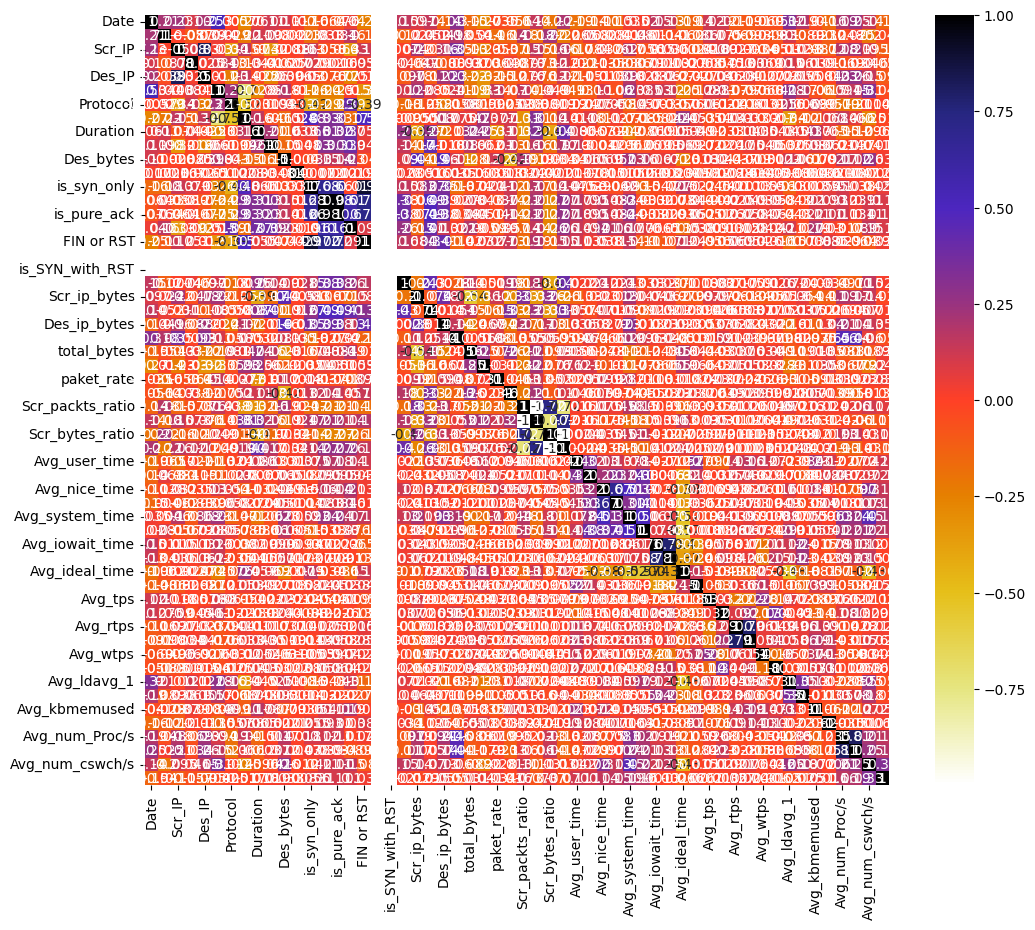

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = df_b.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(df_b,0.9)
print(len(set(corr_features)))
print(corr_features)

In [ ]:
df_c = df_b.drop(['Des_bytes_ratio', 'Des_IP', 'Std_num_proc/s', 'FIN or RST', 'Des_pkts_ratio', 'is_pure_ack'],axis=1)

In [ ]:
X__balanced = df_c.drop(['class1'],axis=1)
y__balanced = df_c['class1']

In [ ]:
from sklearn.preprocessing import LabelEncoder as le
#testdata.attack_cat = le().fit_transform(testdata.attack_cat)
y__balanced = le().fit_transform(y__balanced)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X__balanced,y__balanced, test_size=0.3,random_state=0)

In [ ]:
X_train.shape,y_train.shape

((309447, 59), (309447,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_smt_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_train_smt_sc = scaler.fit_transform(X_train)\nX_test_sc = scaler.fit_transform(X_test)'

In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train_re = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test_re = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train_re.shape

(309447, 59, 1)

In [ ]:
X_train_re_re = np.reshape(np.array(X_train), (X_train.shape[0],1, X_train.shape[1]))
X_test_re_re = np.reshape(np.array(X_test), (X_test.shape[0],1, X_test.shape[1]))

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

In [ ]:
'''from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights= dict(zip(np.unique(y_train),class_weights))
class_weights'''

"from sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight('balanced', np.unique(y_train), y_train)\nclass_weights= dict(zip(np.unique(y_train),class_weights))\nclass_weights"

### **LSTM**

In [ ]:
from keras.regularizers import l1

model = Sequential()
model.add(LSTM(64, input_dim=59, return_sequences=True, activation='relu',
               kernel_regularizer=l1(0.001), recurrent_regularizer=l1(0.0001)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True, activation='relu',
               kernel_regularizer=l1(0.001), recurrent_regularizer=l1(0.0001)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, activation='relu',
               kernel_regularizer=l1(0.001), recurrent_regularizer=l1(0.001)))
model.add(Dense(19))
model.add(Activation('softmax'))

In [ ]:
model = Sequential()
model.add(LSTM(28,input_dim=59, return_sequences=True, activation = 'tanh'))
model.add(Dropout(0.6))
model.add(LSTM(28, return_sequences=True, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(LSTM(28, return_sequences=False, activation = 'tanh'))
model.add(Dense(19))
model.add(Activation('softmax'))

In [ ]:
epochs=500
learning_rate=0.01

from keras.optimizers import SGD
sgd=SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
history = model.fit(X_train_re_re, y_train, validation_split=0.15, epochs = 10, batch_size = 64, verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4110/4110 - 319s - loss: 0.9407 - accuracy: 0.6724 - val_loss: 0.1560 - val_accuracy: 0.9592 - 319s/epoch - 78ms/step
Epoch 2/10
4110/4110 - 315s - loss: 0.4013 - accuracy: 0.8681 - val_loss: 0.0859 - val_accuracy: 0.9770 - 315s/epoch - 77ms/step
Epoch 3/10
4110/4110 - 303s - loss: 0.3055 - accuracy: 0.9023 - val_loss: 0.0643 - val_accuracy: 0.9829 - 303s/epoch - 74ms/step
Epoch 4/10
4110/4110 - 303s - loss: 0.2604 - accuracy: 0.9172 - val_loss: 0.0542 - val_accuracy: 0.9858 - 303s/epoch - 74ms/step
Epoch 5/10
4110/4110 - 320s - loss: 0.2334 - accuracy: 0.9267 - val_loss: 0.0454 - val_accuracy: 0.9891 - 320s/epoch - 78ms/step
Epoch 6/10
4110/4110 - 323s - loss: 0.2156 - accuracy: 0.9327 - val_loss: 0.0406 - val_accuracy: 0.9898 - 323s/epoch - 79ms/step
Epoch 7/10
4110/4110 - 327s - loss: 0.1992 - accuracy: 0.9386 - val_loss: 0.0404 - val_accuracy: 0.9894 - 327s/epoch - 79ms/step
Epoch 8/10
4110/4110 - 322s - loss: 0.1871 - accuracy: 0.9423 - val_loss: 0.0370 - val_accuracy: 0.9913 - 32

In [ ]:
loss, accuracy = model.evaluate(X_test_re_re, y_test)

4145/4145 [==============================] - 142s 34ms/step - loss: 0.0342 - accuracy: 0.9915


In [ ]:
y_pred = model.predict(X_test_re_re)

4145/4145 [==============================] - 110s 27ms/step


In [ ]:

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
classes = ['Bruteforce','command control','Dictionary','Discovering resources','Exfiltration','Fake notification','False data injection']

Accuracy:  0.9914870194011507
Precision: 0.9917
Recall: 0.9915
F1 Score: 0.9913


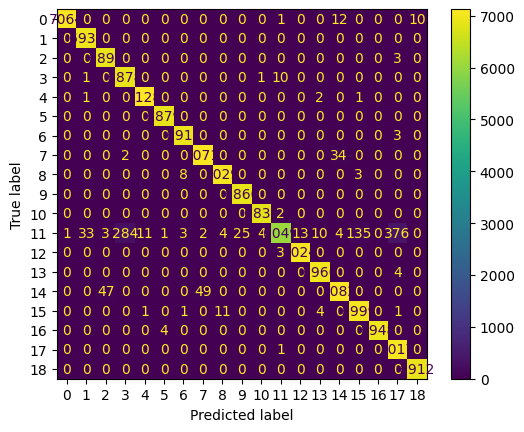

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

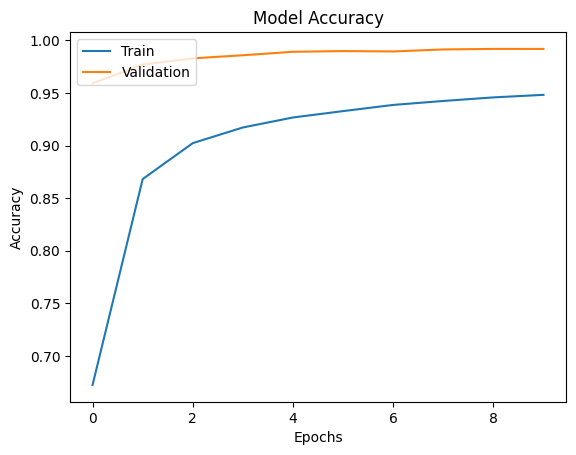

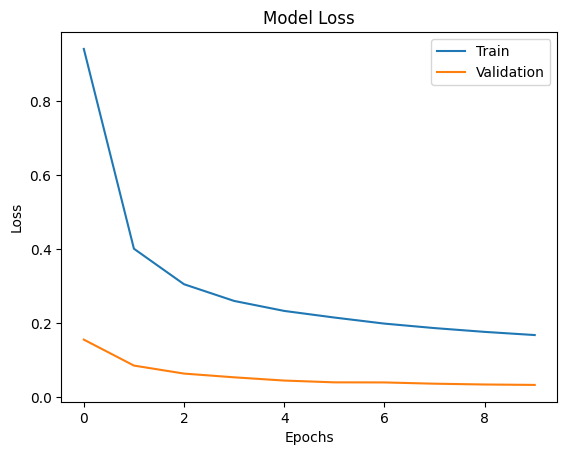

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### **CNN**

In [ ]:
cnn = Sequential()
cnn.add(Convolution1D(32, 3,activation="relu",input_shape=(59, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Convolution1D(32,3, activation="relu"))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(32, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(19, activation="softmax"))

In [ ]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
history = cnn.fit(X_train_re, y_train, validation_split=0.3, epochs = 10, batch_size = 100, verbose=2)


Epoch 1/10
2167/2167 - 139s - loss: 0.5672 - accuracy: 0.8084 - val_loss: 0.0667 - val_accuracy: 0.9765 - 139s/epoch - 64ms/step
Epoch 2/10
2167/2167 - 136s - loss: 0.2392 - accuracy: 0.9134 - val_loss: 0.0292 - val_accuracy: 0.9918 - 136s/epoch - 63ms/step
Epoch 3/10
2167/2167 - 136s - loss: 0.1840 - accuracy: 0.9340 - val_loss: 0.0234 - val_accuracy: 0.9934 - 136s/epoch - 63ms/step
Epoch 4/10
2167/2167 - 134s - loss: 0.1523 - accuracy: 0.9451 - val_loss: 0.0185 - val_accuracy: 0.9949 - 134s/epoch - 62ms/step
Epoch 5/10
2167/2167 - 131s - loss: 0.1389 - accuracy: 0.9505 - val_loss: 0.0208 - val_accuracy: 0.9943 - 131s/epoch - 60ms/step
Epoch 6/10
2167/2167 - 133s - loss: 0.1258 - accuracy: 0.9556 - val_loss: 0.0133 - val_accuracy: 0.9963 - 133s/epoch - 62ms/step
Epoch 7/10
2167/2167 - 131s - loss: 0.1177 - accuracy: 0.9581 - val_loss: 0.0115 - val_accuracy: 0.9967 - 131s/epoch - 60ms/step
Epoch 8/10
2167/2167 - 135s - loss: 0.1117 - accuracy: 0.9611 - val_loss: 0.0152 - val_accuracy: 

In [ ]:
loss, accuracy = cnn.evaluate(X_test_re, y_test)

4145/4145 [==============================] - 89s 21ms/step - loss: 0.0113 - accuracy: 0.9972


In [ ]:
y_pred = cnn.predict(X_test_re)

4145/4145 [==============================] - 39s 9ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

Accuracy:  0.9972025546482081
Precision: 0.9972
Recall: 0.9972
F1 Score: 0.9972


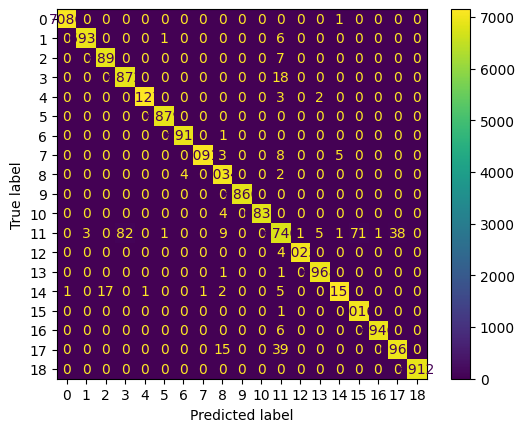

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

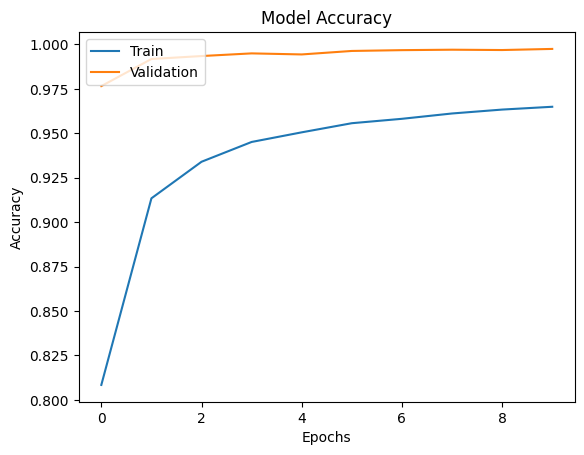

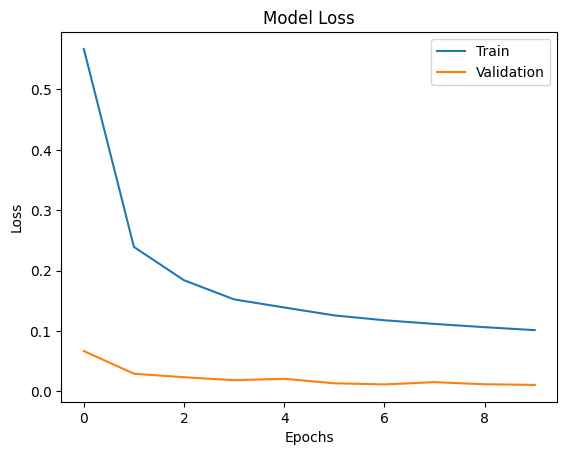

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### **CNN-LSTM**

In [ ]:

lstm_output_size = 70

cnnlstm = Sequential()
cnnlstm.add(Convolution1D(32, 3,activation="relu",input_shape=(59, 1)))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(Convolution1D(32, 3,activation="relu"))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(LSTM(lstm_output_size))
cnnlstm.add(Dropout(0.1))
cnnlstm.add(Dense(19, activation="softmax"))

In [ ]:
cnnlstm.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
history = cnnlstm.fit(X_train_re, y_train, validation_split=0.15, epochs = 10, batch_size = 256, verbose=2)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
1028/1028 - 190s - loss: 0.4407 - accuracy: 0.8701 - val_loss: 0.0928 - val_accuracy: 0.9688 - 190s/epoch - 185ms/step
Epoch 2/10
1028/1028 - 183s - loss: 0.0714 - accuracy: 0.9784 - val_loss: 0.0418 - val_accuracy: 0.9861 - 183s/epoch - 178ms/step
Epoch 3/10
1028/1028 - 192s - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0327 - val_accuracy: 0.9888 - 192s/epoch - 187ms/step
Epoch 4/10
1028/1028 - 196s - loss: 0.0357 - accuracy: 0.9895 - val_loss: 0.0232 - val_accuracy: 0.9934 - 196s/epoch - 190ms/step
Epoch 5/10
1028/1028 - 191s - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.0143 - val_accuracy: 0.9958 - 191s/epoch - 185ms/step
Epoch 6/10
1028/1028 - 195s - loss: 0.0187 - accuracy: 0.9947 - val_loss: 0.0214 - val_accuracy: 0.9933 - 195s/epoch - 190ms/step
Epoch 7/10
1028/1028 - 185s - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.0121 - val_accuracy: 0.9961 - 185s/epoch - 180ms/step
Epoch 8/10
1028/1028 - 195s - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0074 - val_acc

In [ ]:
loss, accuracy = cnnlstm.evaluate(X_test_re, y_test)
y_pred = cnnlstm.predict(X_test_re)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

4145/4145 [==============================] - 150s 36ms/step


Accuracy:  0.9972402560680436
Precision: 0.9972
Recall: 0.9972
F1 Score: 0.9972


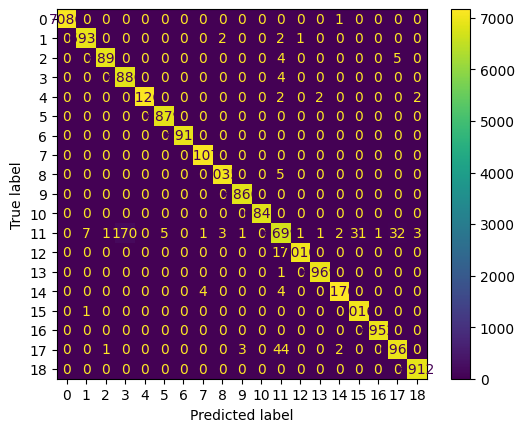

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


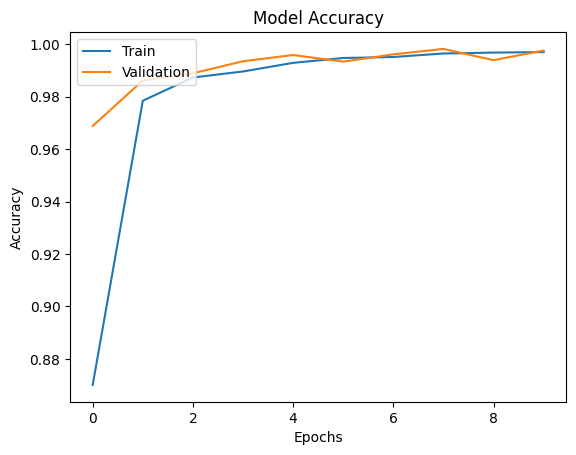

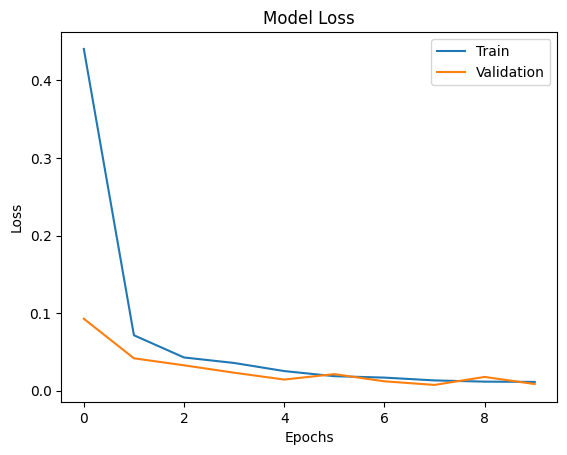

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
gru = Sequential()
gru.add(GRU(128,input_dim=59, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=False))
gru.add(Dropout(0.1))
gru.add(Dense(19))
gru.add(Activation('softmax'))

In [ ]:
gru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = gru.fit(X_train_re_re, y_train, validation_split=0.15, epochs = 10, batch_size = 256, verbose=2)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1028/1028 - 176s - loss: 0.1653 - accuracy: 0.9609 - val_loss: 0.0130 - val_accuracy: 0.9961 - 176s/epoch - 171ms/step
Epoch 2/10
1028/1028 - 169s - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0063 - val_accuracy: 0.9981 - 169s/epoch - 164ms/step
Epoch 3/10
1028/1028 - 161s - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0042 - val_accuracy: 0.9988 - 161s/epoch - 157ms/step
Epoch 4/10
1028/1028 - 167s - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0042 - val_accuracy: 0.9988 - 167s/epoch - 162ms/step
Epoch 5/10
1028/1028 - 173s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0029 - val_accuracy: 0.9993 - 173s/epoch - 168ms/step
Epoch 6/10
1028/1028 - 162s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0025 - val_accuracy: 0.9994 - 162s/epoch - 157ms/step
Epoch 7/10
1028/1028 - 160s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0020 - val_accuracy: 0.9996 - 160s/epoch - 155ms/step
Epoch 8/10
1028/1028 - 160s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.99

In [ ]:
loss, accuracy = gru.evaluate(X_test_re_re, y_test)
y_pred = gru.predict(X_test_re_re)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

   3/4145 [..............................] - ETA: 2:52 - loss: 4.5033e-05 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4145/4145 [==============================] - 155s 37ms/step


Accuracy:  0.9992685924551918
Precision: 0.9993
Recall: 0.9993
F1 Score: 0.9993


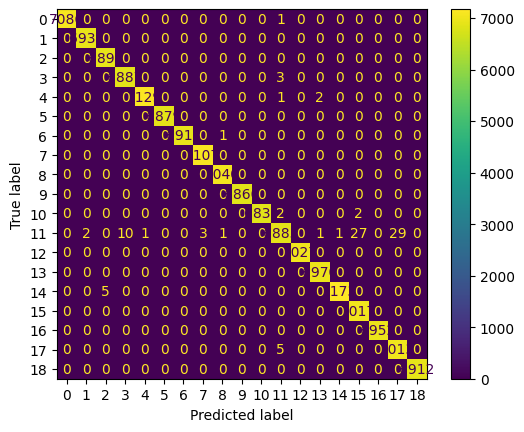

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


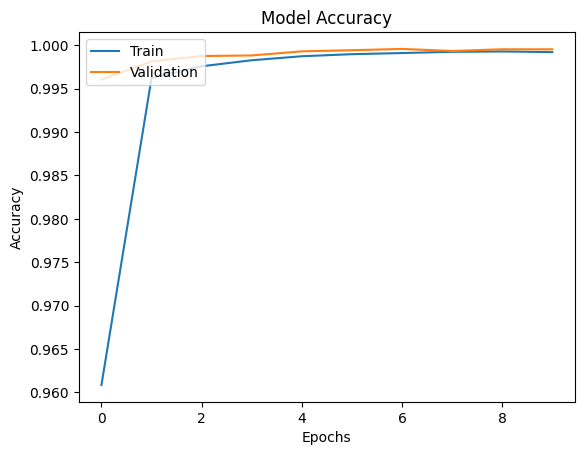

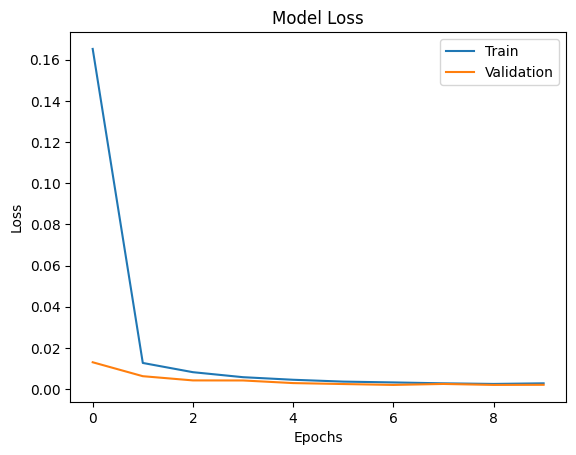

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()